In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from plotly import express as px
import seaborn as sns


import kagglehub

## Download data sets

NOTE: You will need to register with Kaggle and create a kaggle.jcon file that contains your username and key in the following format: `{"username":"<user_name>", "key":"<kaggle_key>"}`

In [3]:
datasets = []
#adult depression
# datasets.append(kagglehub.dataset_download("sonawanelalitsunil/adult-depression-lghc-indicator"))

# #mental health dataset
# datasets.append(kagglehub.dataset_download("bhavikjikadara/mental-health-dataset"))

#student depression
datasets.append(kagglehub.dataset_download("adilshamim8/student-depression-dataset",))

# #student mental health
# datasets.append(kagglehub.dataset_download("shariful07/student-mental-health"))

# #student perfromance factors
# datasets.append(kagglehub.dataset_download("lainguyn123/student-performance-factors"))

# #student alcohol consumption
# datasets.append(kagglehub.dataset_download("uciml/student-alcohol-consumption"))

# #videogame sales
# datasets.append(kagglehub.dataset_download("zahidmughal2343/video-games-sale"))

# #math student perfromance
# datasets.append(kagglehub.dataset_download("adilshamim8/math-students"))

# #supermarket sales
# datasets.append(kagglehub.dataset_download("aungpyaeap/supermarket-sales"))

# #spotify tracks
datasets.append(kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset"))

for dataset in datasets:
    print(dataset)

C:\Users\bpburch\.cache\kagglehub\datasets\adilshamim8\student-depression-dataset\versions\1
C:\Users\bpburch\.cache\kagglehub\datasets\maharshipandya\-spotify-tracks-dataset\versions\1


In [4]:
# Initialize an empty dictionary to store the datasets
datasets_dict = {}

for dataset_path in datasets:
    # Extract the dataset name from the path
    dataset_name = os.path.basename(os.path.dirname(os.path.dirname(dataset_path)))
    
    # List all files in the dataset directory
    csv_files = [file for file in os.listdir(dataset_path) if file.endswith('.csv')]
    
    # Load the CSV files into dataframes
    if len(csv_files) == 1:
        # If there's only one CSV, load it as a single dataframe
        datasets_dict[dataset_name] = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
    else:
        # If there are multiple CSVs, load them into a list of dataframes
        datasets_dict[dataset_name] = [pd.read_csv(os.path.join(dataset_path, csv)) for csv in csv_files]

# Print the keys of the dictionary to verify
print(datasets_dict.keys())

dict_keys(['student-depression-dataset', '-spotify-tracks-dataset'])


In [5]:
datasets_dict['student-depression-dataset']

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [6]:
data = datasets_dict['student-depression-dataset'].copy()

In [7]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [8]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


#### First, we are going to create all the univariate plots so we can see what we are dealing with. 

<Axes: ylabel='Gender'>

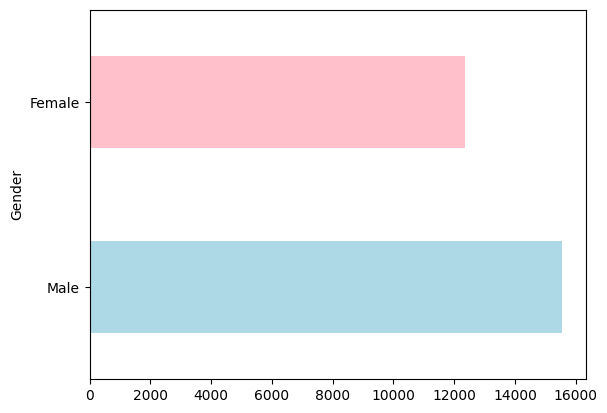

In [9]:
data['Gender'].value_counts().plot(kind='barh', color=['lightblue', 'pink'])

<Axes: ylabel='Frequency'>

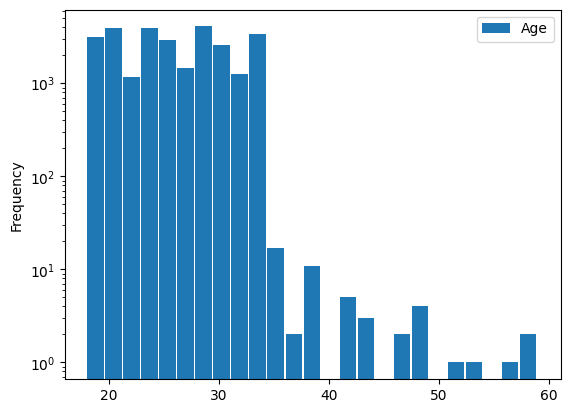

In [10]:
data.plot(kind='hist', y='Age', logy=True, bins=25, width=1.5)

<Axes: ylabel='City'>

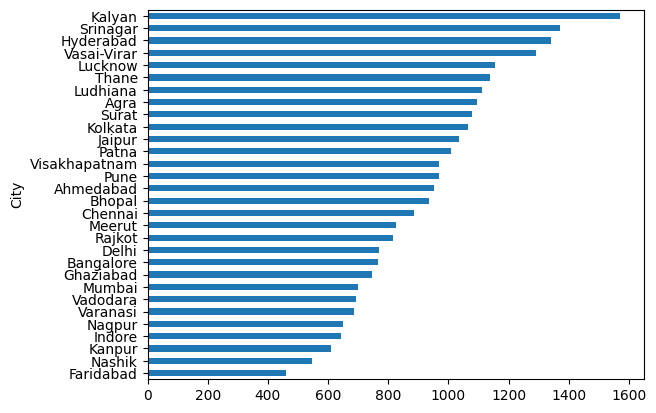

In [11]:
data['City'].value_counts().sort_values().tail(30).plot(kind='barh')

<Axes: ylabel='Profession'>

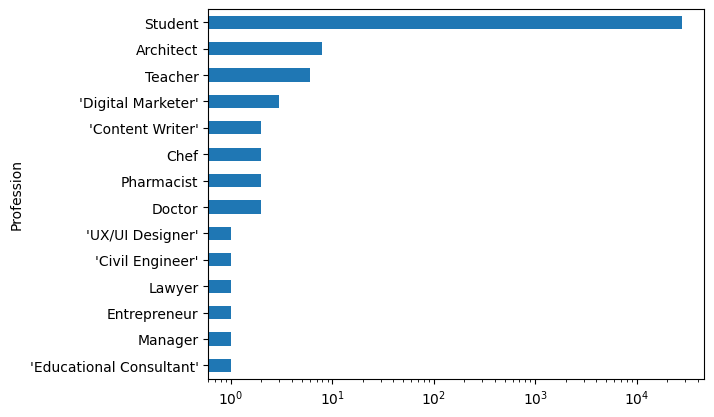

In [12]:
data['Profession'].value_counts().sort_values().plot(kind='barh', logx=True)

<Axes: ylabel='Job Satisfaction'>

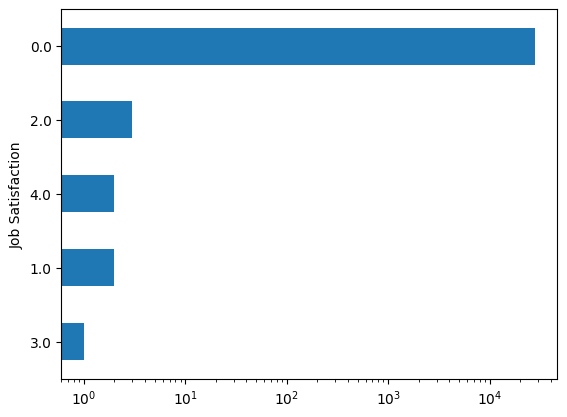

In [13]:
data['Job Satisfaction'].value_counts().sort_values().plot(kind='barh', logx=True)

<Axes: ylabel='Study Satisfaction'>

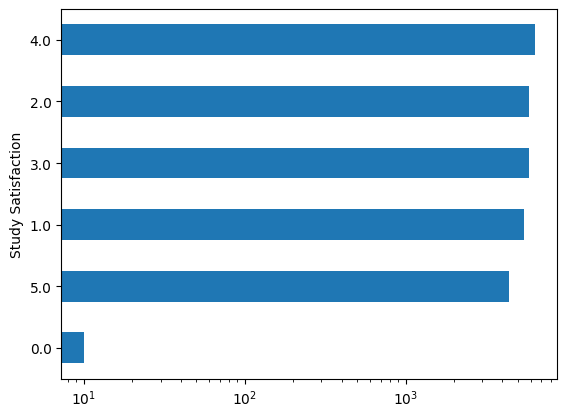

In [14]:
data['Study Satisfaction'].value_counts().sort_values().plot(kind='barh', logx=True)

<Axes: ylabel='Academic Pressure'>

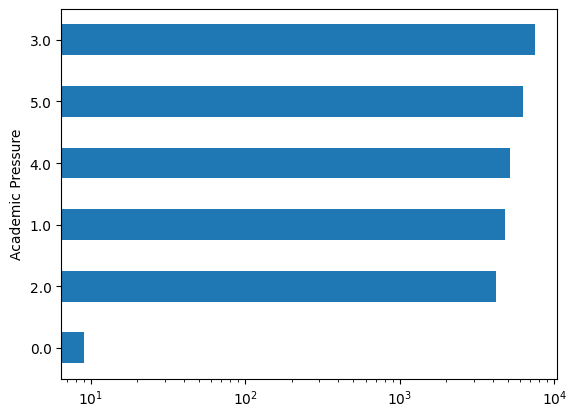

In [15]:
data['Academic Pressure'].value_counts().sort_values().plot(kind='barh', logx=True)

<Axes: ylabel='Work/Study Hours'>

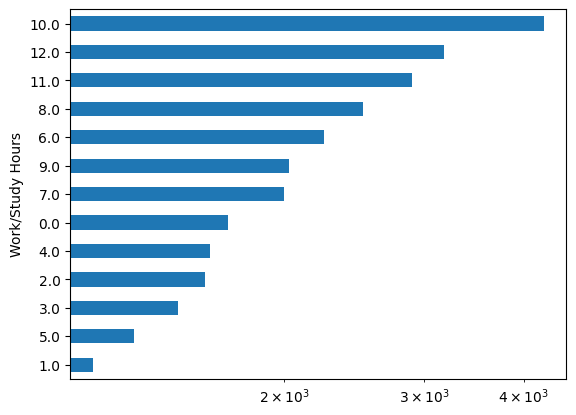

In [16]:
data['Work/Study Hours'].value_counts().sort_values().plot(kind='barh', logx=True)

<Axes: ylabel='Dietary Habits'>

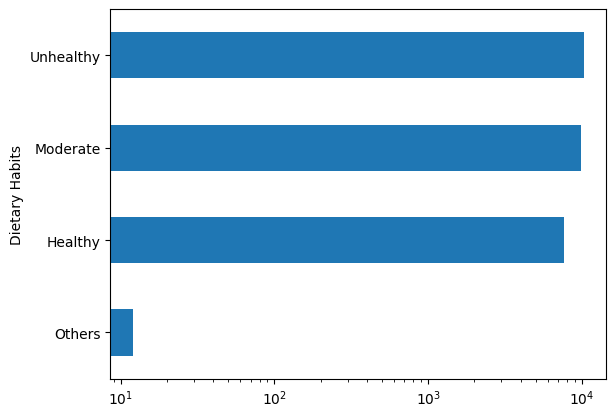

In [17]:
data['Dietary Habits'].value_counts().sort_values().plot(kind='barh', logx=True)

<Axes: ylabel='Degree'>

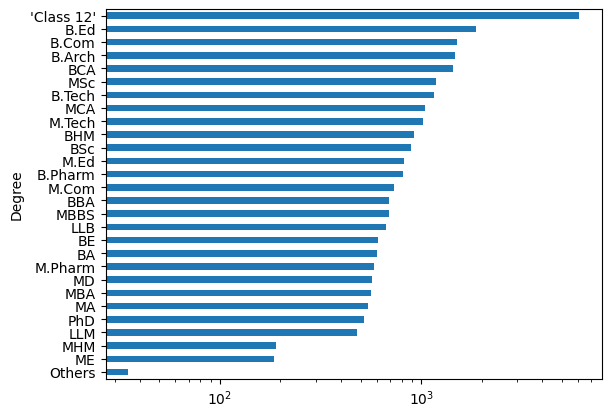

In [18]:
data['Degree'].value_counts().sort_values().plot(kind='barh', logx=True)

<Axes: ylabel='Sleep Duration'>

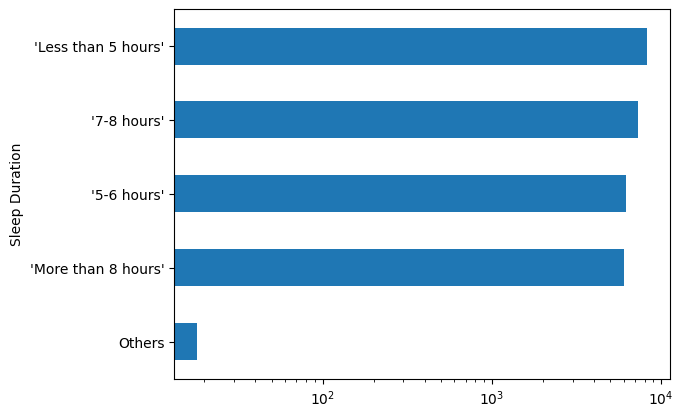

In [19]:
data['Sleep Duration'].value_counts().sort_values().plot(kind='barh', logx=True)

<Axes: ylabel='Financial Stress'>

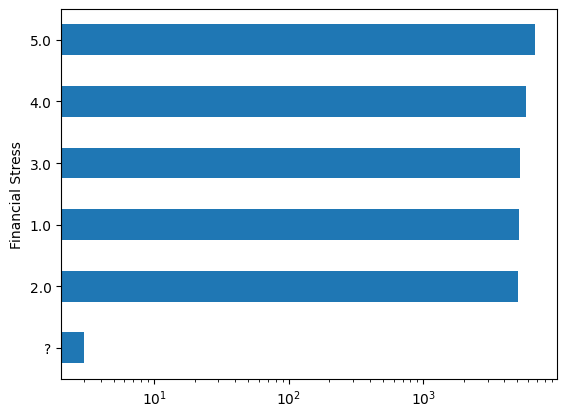

In [20]:
data['Financial Stress'].value_counts().sort_values().plot(kind='barh', logx=True)

<Axes: ylabel='Have you ever had suicidal thoughts ?'>

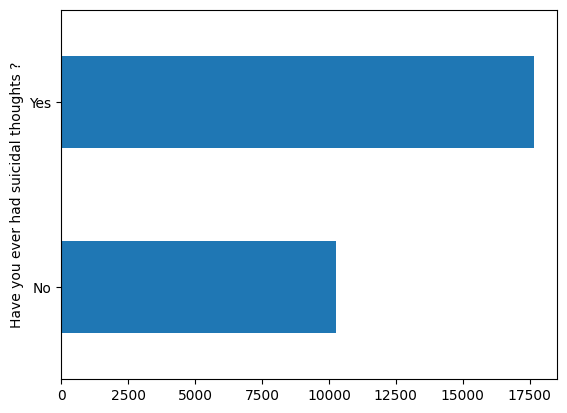

In [21]:
data['Have you ever had suicidal thoughts ?'].value_counts().sort_values().plot(kind='barh')

<Axes: ylabel='Family History of Mental Illness'>

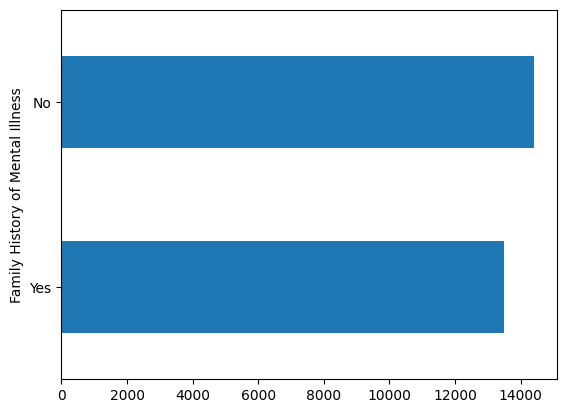

In [22]:
data['Family History of Mental Illness'].value_counts().sort_values().plot(kind='barh')

<Axes: ylabel='Depression'>

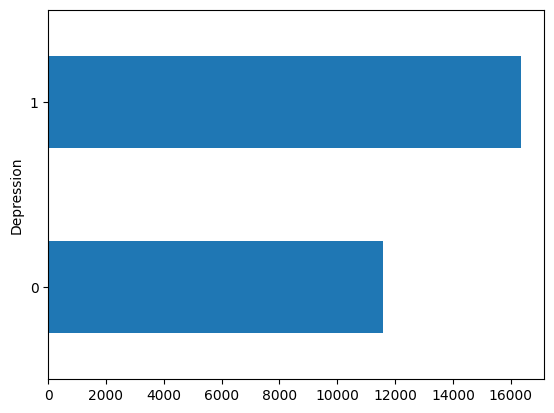

In [23]:
data['Depression'].value_counts().sort_values().plot(kind='barh')

#### Now let's dig in a find the happy people. I am expecially interesting in Kolkata because I spent some months there.

In [24]:
data['Poor Mental Health'] = (data['Depression'] == 1) | (data['Have you ever had suicidal thoughts ?'] == 'Yes')

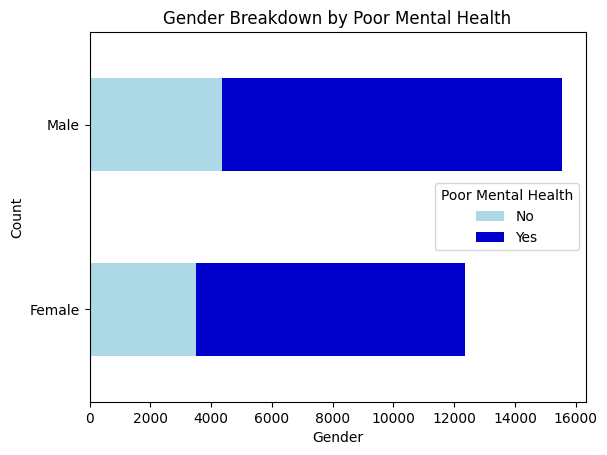

In [25]:
# Create a crosstab of Gender and Poor Mental Health
crosstab = pd.crosstab(data['Gender'], data['Poor Mental Health'])

# Plot the stacked bar chart with shades of blue
crosstab.plot(kind='barh', stacked=True, color=['lightblue', 'mediumblue'])

# Set the title and labels
plt.title('Gender Breakdown by Poor Mental Health')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Poor Mental Health', labels=['No', 'Yes'])

# Show the plot
plt.show()

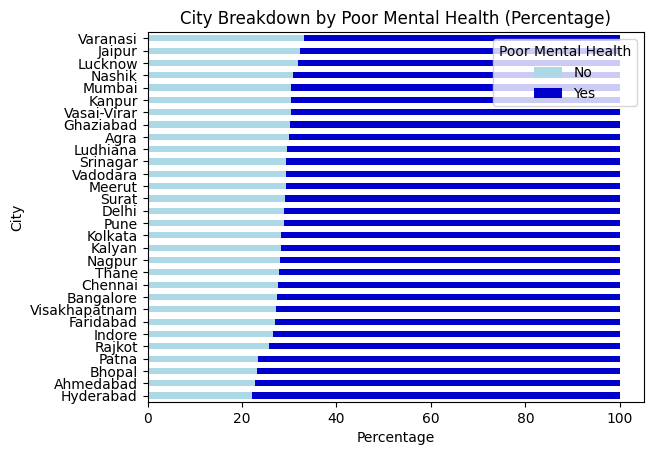

In [26]:
# Create a crosstab of City and Poor Mental Health
crosstab = pd.crosstab(data['City'], data['Poor Mental Health']).sort_values(by=True, ascending=True).tail(30)

# Convert crosstab values to percentages of the total
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Sort the crosstab_percentage DataFrame by the percentage of "Poor Mental Health = No" in descending order
crosstab_percentage_sorted = crosstab_percentage.sort_values(by=False, ascending=True)

# Plot the sorted stacked bar chart with shades of blue
crosstab_percentage_sorted.plot(kind='barh', stacked=True, color=['lightblue', 'mediumblue'])

# Set the title and labels
plt.title('City Breakdown by Poor Mental Health (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('City')
plt.legend(title='Poor Mental Health', labels=['No', 'Yes'])

# Show the plot
plt.show()

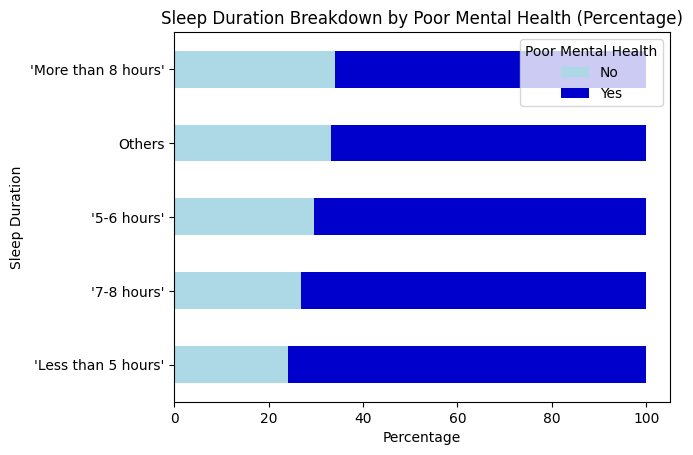

In [27]:
# Create a crosstab of Sleep Duration and Poor Mental Health
crosstab = pd.crosstab(data['Sleep Duration'], data['Poor Mental Health']).sort_values(by=True, ascending=True).tail(30)

# Convert crosstab values to percentages of the total
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Sort the crosstab_percentage DataFrame by the percentage of "Poor Mental Health = No" in descending order
crosstab_percentage_sorted = crosstab_percentage.sort_values(by=False, ascending=True)

# Plot the sorted stacked bar chart with shades of blue
crosstab_percentage_sorted.plot(kind='barh', stacked=True, color=['lightblue', 'mediumblue'])

# Set the title and labels
plt.title('Sleep Duration Breakdown by Poor Mental Health (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Sleep Duration')
plt.legend(title='Poor Mental Health', labels=['No', 'Yes'])

# Show the plot
plt.show()

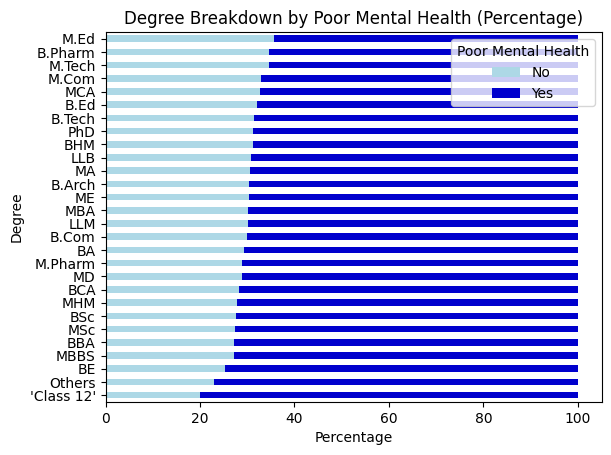

In [28]:
# Create a crosstab of Degree and Poor Mental Health
crosstab = pd.crosstab(data['Degree'], data['Poor Mental Health']).sort_values(by=True, ascending=True).tail(30)

# Convert crosstab values to percentages of the total
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Sort the crosstab_percentage DataFrame by the percentage of "Poor Mental Health = No" in descending order
crosstab_percentage_sorted = crosstab_percentage.sort_values(by=False, ascending=True)

# Plot the sorted stacked bar chart with shades of blue
crosstab_percentage_sorted.plot(kind='barh', stacked=True, color=['lightblue', 'mediumblue'])

# Set the title and labels
plt.title('Degree Breakdown by Poor Mental Health (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Degree')
plt.legend(title='Poor Mental Health', labels=['No', 'Yes'])

# Show the plot
plt.show()

In [29]:
data['Degree Modified'] = data['Degree'].apply(lambda x: 'MD' if x=='MD' else 'Law' if x.startswith('L') else 'Masters' if x.startswith('M') else 'Bachelors' if x.startswith('B') else "PhD" if x == 'PhD' else 'Others')

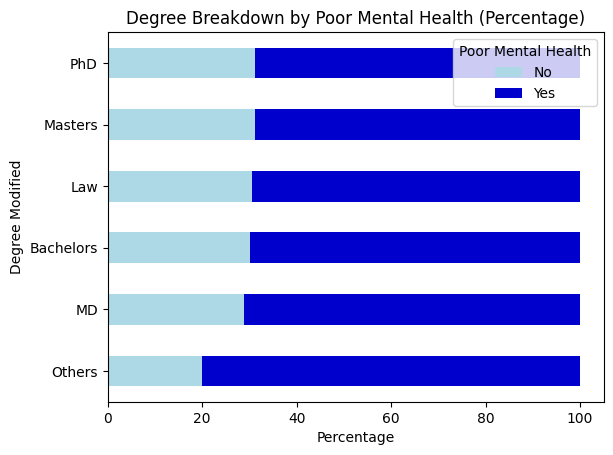

In [30]:
# Create a crosstab of Degree and Poor Mental Health
crosstab = pd.crosstab(data['Degree Modified'], data['Poor Mental Health']).sort_values(by=True, ascending=True).tail(30)

# Convert crosstab values to percentages of the total
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Sort the crosstab_percentage DataFrame by the percentage of "Poor Mental Health = No" in descending order
crosstab_percentage_sorted = crosstab_percentage.sort_values(by=False, ascending=True)

# Plot the sorted stacked bar chart with shades of blue
crosstab_percentage_sorted.plot(kind='barh', stacked=True, color=['lightblue', 'mediumblue'])

# Set the title and labels
plt.title('Degree Breakdown by Poor Mental Health (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Degree Modified')
plt.legend(title='Poor Mental Health', labels=['No', 'Yes'])

# Show the plot
plt.show()

In [31]:
# I am going to get some sleep but probably eat like a graduate student. I don't want to work tooo hard.
data_ben = data[
    (data['Gender'] == 'Male') &
    (data['Profession'] == 'Student') &
    (data['Sleep Duration'].isin(["'5-6 hours'","'7-8 hours'"])) &
    (data['Dietary Habits'].isin(['Unhealthy', 'Moderate'])) &
    (data['Work/Study Hours'] <= 8) &
    ((data['Age'] >= 22) & (data['Age'] <= 29))   
     ]

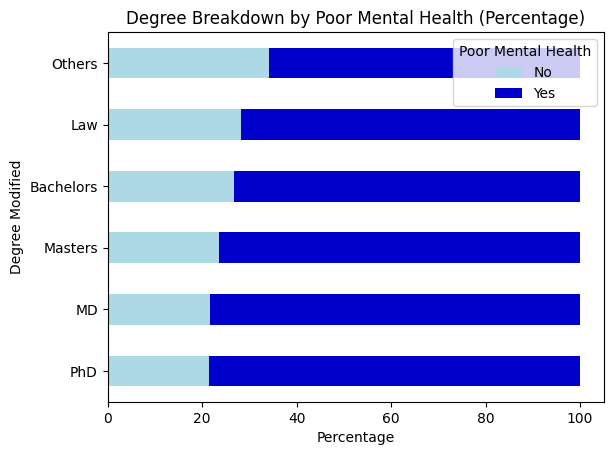

In [32]:
# Create a crosstab of Degree and Poor Mental Health
crosstab = pd.crosstab(data_ben['Degree Modified'], data_ben['Poor Mental Health']).sort_values(by=True, ascending=True).tail(30)

# Convert crosstab values to percentages of the total
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Sort the crosstab_percentage DataFrame by the percentage of "Poor Mental Health = No" in descending order
crosstab_percentage_sorted = crosstab_percentage.sort_values(by=False, ascending=True)

# Plot the sorted stacked bar chart with shades of blue
crosstab_percentage_sorted.plot(kind='barh', stacked=True, color=['lightblue', 'mediumblue'])

# Set the title and labels
plt.title('Degree Breakdown by Poor Mental Health (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Degree Modified')
plt.legend(title='Poor Mental Health', labels=['No', 'Yes'])

# Show the plot
plt.show()

In [33]:
data_ben['Degree Modified'].value_counts()

Degree Modified
Bachelors    814
Masters      451
Law           46
Others        41
MD            37
PhD           28
Name: count, dtype: int64